# Thresholding-Based Segmentation

This task focuses on image segmentation using thresholding techniques, specifically global thresholding via Otsu’s method and adaptive (local) thresholding. Thresholding is a fundamental technique in image processing that segments an image by converting it into a binary image based on intensity values. In this exercise, we implement both global and adaptive thresholding methods, visualize the results, compare their effectiveness, and analyze their performance using histograms and practical considerations. This approach is commonly used in applications such as document analysis, medical imaging, and quality control in industrial settings

___

## Part a

In this exercise, we implemented global thresholding using Otsu’s method in two ways: first, by manually computing the optimal threshold, and second, by using a built-in library function. This allows us to better understand the underlying algorithm as well as validate our manual implementation. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image
img = cv2.imread("/mnt/e/Term 4/HW/DIP-HW8/data/images/q2/coin.png", cv2.IMREAD_GRAYSCALE)
print(f'Size of image is: {img.shape}')

Size of image is: (400, 401)


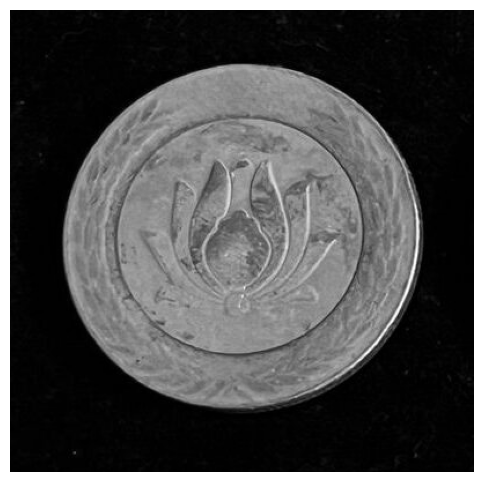

In [3]:
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='grey')
plt.axis('off')
plt.show()

In [4]:
print(f'Min intensity in image is: {img.min()}')
print(f'Max intensity in image is: {img.max()}')

Min intensity in image is: 0
Max intensity in image is: 244


In [5]:
hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
bins = np.arange(256)

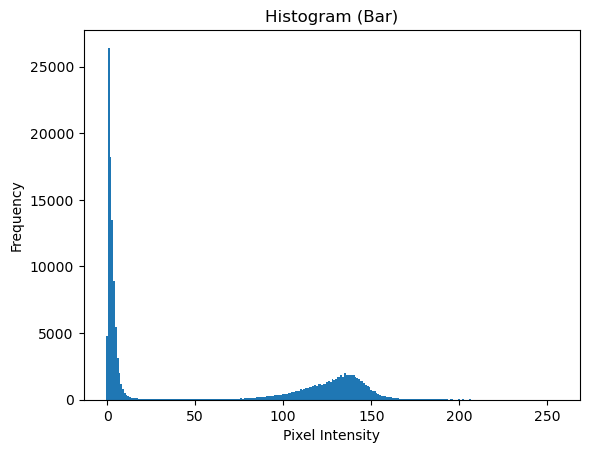

In [6]:
plt.bar(x=bins, height=hist.ravel(), width=1.0)
plt.title("Histogram (Bar)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [7]:
hist = hist.flatten()
total_pixels = img.size

# Normalize histogram
probs = hist / total_pixels

In [8]:
cum_prob = np.cumsum(probs)
cum_mean = np.cumsum(probs * np.arange(256))
global_mean = cum_mean[-1]

In [9]:
max_between_var = 0
optimal_thresh = 0

for k in range(1, 256):
    p1 = cum_prob[k]
    p2 = 1 - p1

    if p1 == 0 or p2 == 0:
        continue

    mu1 = cum_mean[k] / p1
    mu2 = (global_mean - cum_mean[k]) / p2

    between_var = p1 * p2 * ((mu1 - mu2) ** 2)

    if between_var > max_between_var:
        max_between_var = between_var
        optimal_thresh = k

In [10]:
print(f"Otsu optimal threshold: {optimal_thresh}")

Otsu optimal threshold: 66


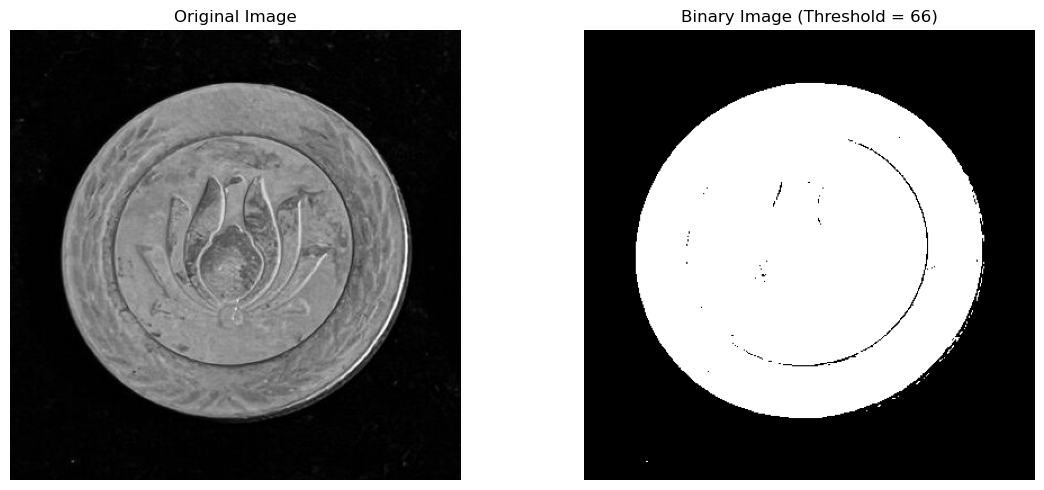

In [11]:
# Apply the optimal threshold to binarize the image
_, binary = cv2.threshold(src=img, thresh=optimal_thresh, maxval=255, type=cv2.THRESH_BINARY)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title(f"Binary Image (Threshold = {optimal_thresh})")
plt.axis('off')

plt.tight_layout()
plt.show()

___

In this section, we apply Otsu’s method for global thresholding using OpenCV’s built-in function cv2.threshold. This function automatically computes the optimal threshold value that minimizes intra-class variance. We load the image in grayscale mode and apply Otsu’s method by setting the threshold value to 0 and adding the flag cv2.THRESH_OTSU. The output includes the optimal threshold value and the resulting binary image. The result is then visualized alongside the original grayscale image to observe the effect of thresholding.

___

Otsu optimal threshold: 66.0


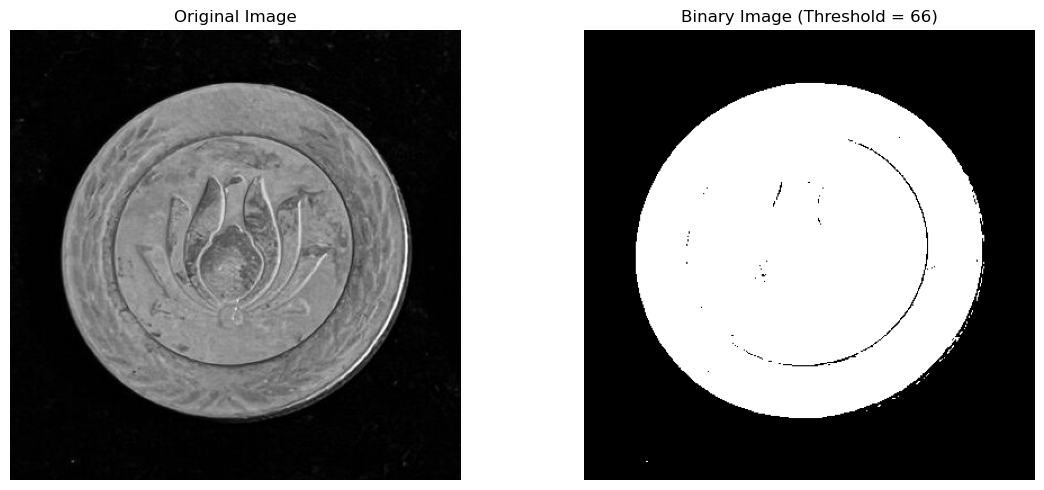

In [12]:
# Apply Otsu's thresholding 
ret, otso = cv2.threshold(src=img, thresh=0, maxval=255, type=cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Print the calculated optimal threshold
print(f"Otsu optimal threshold: {ret}")

# Display the original and thresholded images 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otso, cmap='gray')
plt.title(f"Binary Image (Threshold = {int(ret)})")
plt.axis('off')

plt.tight_layout()
plt.show()

___

## Part b

In [55]:
kernel_size = 15
a = 2
b = 0.0001

In [56]:
# Load the image
img = cv2.imread("/mnt/e/Term 4/HW/DIP-HW8/data/images/q2/coin.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur before thresholding
img = cv2.GaussianBlur(img, (3, 3), sigmaX=0.4)

In [57]:
# Compute local mean
mean_local = cv2.blur(img, (kernel_size, kernel_size))

In [58]:
# Compute local sd
squared_img = img ** 2
mean_squared = cv2.blur(squared_img, (kernel_size, kernel_size))
std_local = np.sqrt(mean_squared - mean_local ** 2)

In [59]:
# Compute threshold
T_xy = a * std_local + b * mean_local

In [60]:
# Apply threshold
binary_img = (img > T_xy).astype(np.uint8) * 255

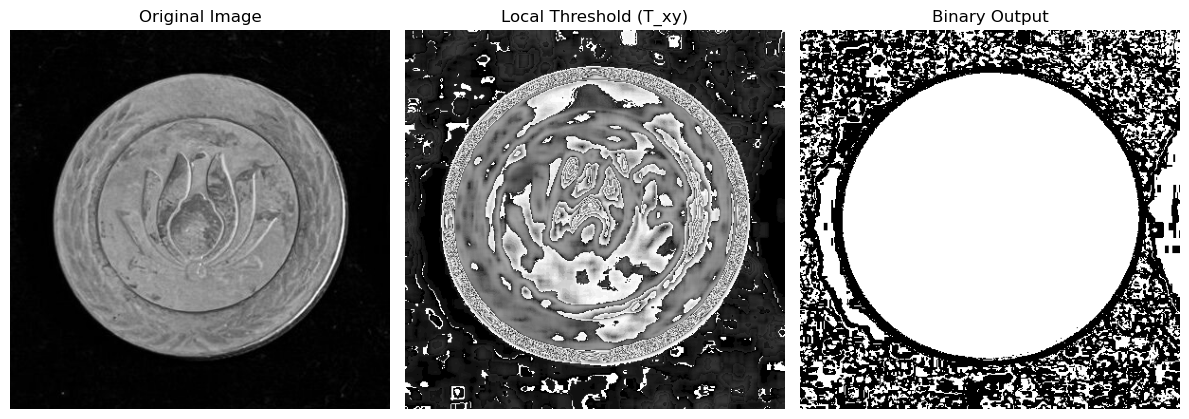

In [61]:
# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Local Threshold (T_xy)')
plt.imshow(T_xy, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Binary Output')
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

___


## Adaptive Thresholding

Adaptive thresholding is a local image segmentation technique where the threshold value is computed for each pixel based on the intensity of its neighboring pixels. This is especially useful for images with non-uniform illumination.

- **Mean Method (`ADAPTIVE_THRESH_MEAN_C`)**:  
  The threshold for a pixel is the mean intensity of the surrounding window minus a constant `C`. It is simple and works well when local regions have consistent lighting.

- **Gaussian Method (`ADAPTIVE_THRESH_GAUSSIAN_C`)**:  
  The threshold is a weighted sum (Gaussian-weighted) of the surrounding window pixels minus `C`. It gives more weight to pixels near the center of the window, producing smoother results and reducing noise sensitivity.


In [122]:
adaptive_thresh_gaussian = cv2.adaptiveThreshold(img, 255,
                                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                cv2.THRESH_BINARY,
                                                15,  # kernel size
                                                -10)   # C


In [125]:
adaptive_thresh_mean = cv2.adaptiveThreshold(img, 255,
                                            cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY,
                                            15,  
                                            30)   


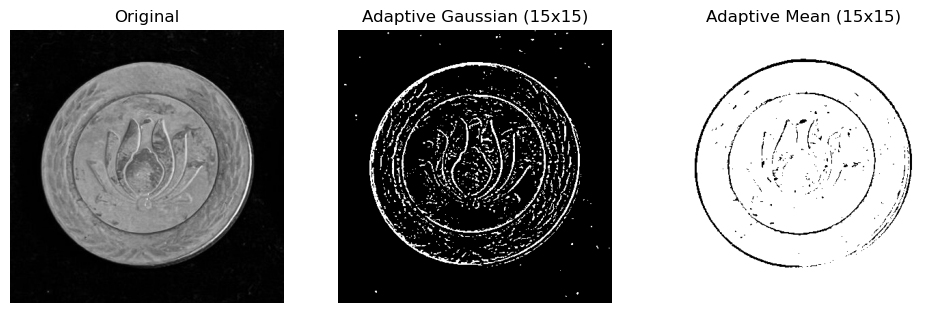

In [126]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adaptive_thresh_gaussian , cmap='gray')
plt.title(f"Adaptive Gaussian (15x15)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresh_mean, cmap='gray')
plt.title("Adaptive Mean (15x15)")
plt.axis('off')

plt.show()

___

In [69]:
img[1:50, 1:50].mean()

2.7242815493544357

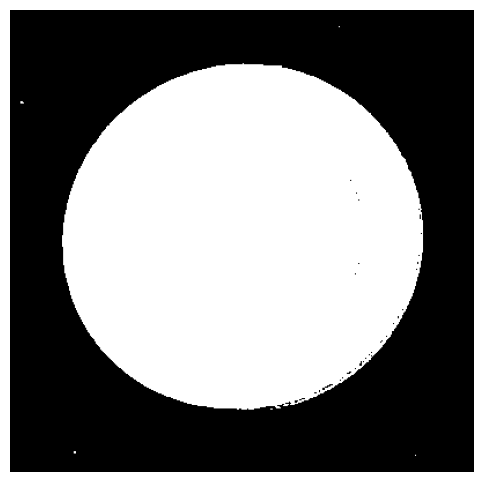

In [ ]:
# Read two grayscale images
img1 = img

# Threshold value for img1
threshold = 38

# Create a mask: where img1 is below threshold
mask = img1 > threshold

# Show the result using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

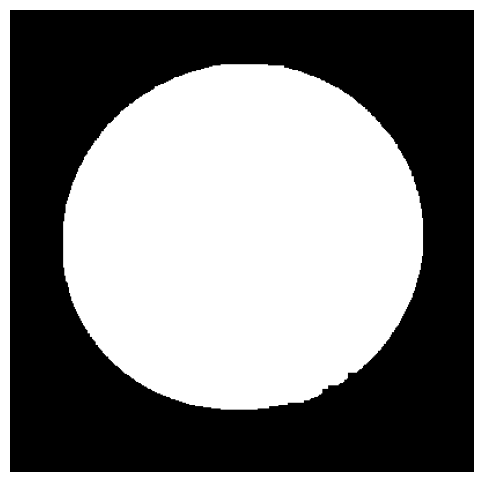

In [96]:
kernel = np.ones((27, 27), np.uint8) 
img_clean = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(8, 6))
plt.imshow(img_clean, cmap='gray')
plt.axis('off')
plt.show()

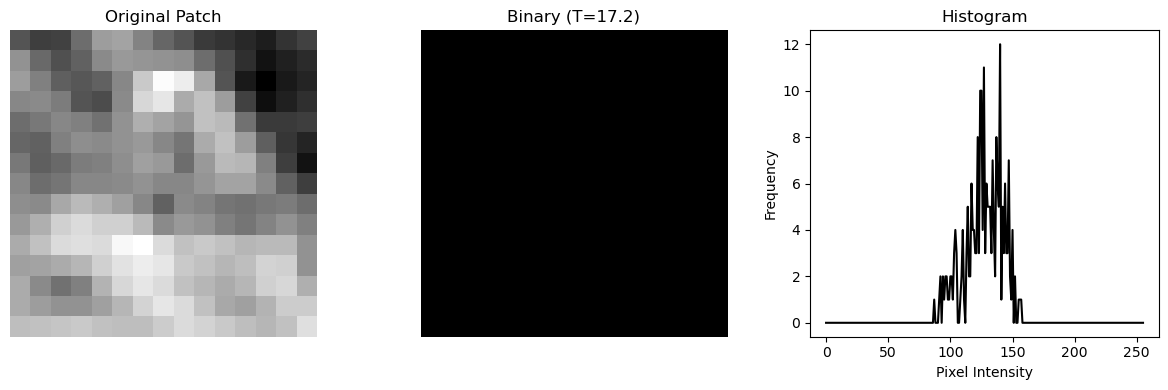

In [83]:
x, y = 200, 200
win_size = 15

patch = img[y - (win_size // 2): y + (win_size // 2) + 1, x - (win_size // 2):x + (win_size // 2) + 1]
binary_patch = binary_img[y - (win_size // 2):y + (win_size // 2) + 1, x - (win_size // 2):x + (win_size // 2) + 1]

T_opt = T_xy[200, 200]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Patch")
plt.imshow(patch, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Binary (T={T_opt:.1f})")
plt.imshow(binary_patch, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
hist = cv2.calcHist([patch.astype(np.uint8)], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

___